# Shampoo Sales Dataset  
This dataset describes the monthly number of sales of shampoo over a 3 year period.

Dataset:  (Top 5 Rows)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Freq: MS, Name: Sales, dtype: float64


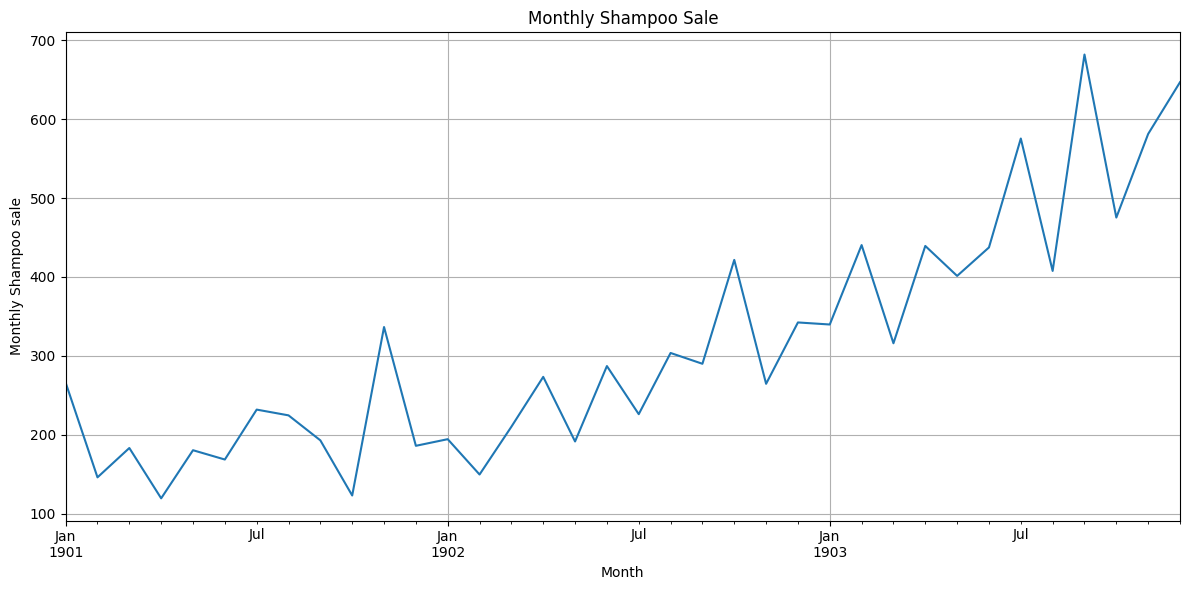

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
    
# squeeze is used to change return object to series instead of dataframe.
shampoo_dataset = pd.read_csv("Datasets/shampoo-sales.csv", header=0, index_col=0, squeeze=True, parse_dates=[0], date_parser=parser)
shampoo_dataset.index.freq = 'MS'

print('================================================================================')
print('Dataset:  (Top 5 Rows)\n')
print(shampoo_dataset.head())

print('================================================================================')
# Visualize data.
shampoo_dataset.plot(figsize=(12, 6))
plt.ylabel("Monthly Shampoo sale")
plt.title("Monthly Shampoo Sale")
plt.tight_layout()
plt.grid()
plt.show()


### Autocorrelation Plot - To Select optimal lag value.

<Axes: title={'center': 'Autocorrelation Plot'}, xlabel='Lag', ylabel='Autocorrelation'>

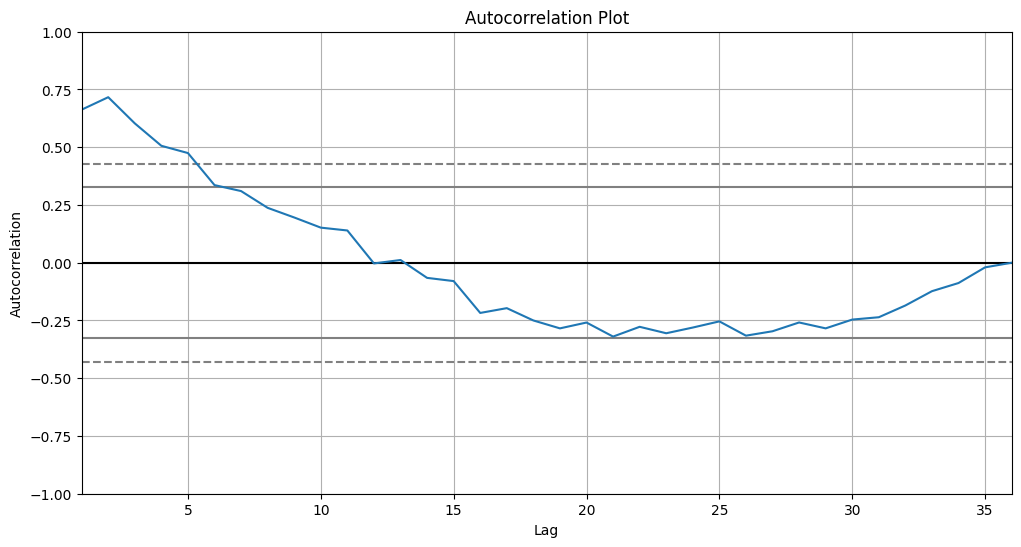

In [7]:
plt.figure(figsize=(12, 6)) 
plt.title("Autocorrelation Plot")
autocorrelation_plot(shampoo_dataset)

### ARIMA (AutoRegressive Integrated Moving Average) Forecast Model


Dataset: (Top 5 Rows)
Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Freq: MS, Name: Sales, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Thu, 24 Aug 2023   AIC                            408.969
Time:                        17:08:18   BIC                            418.301
Sample:                    01-01-1901   HQIC                           412.191
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647 

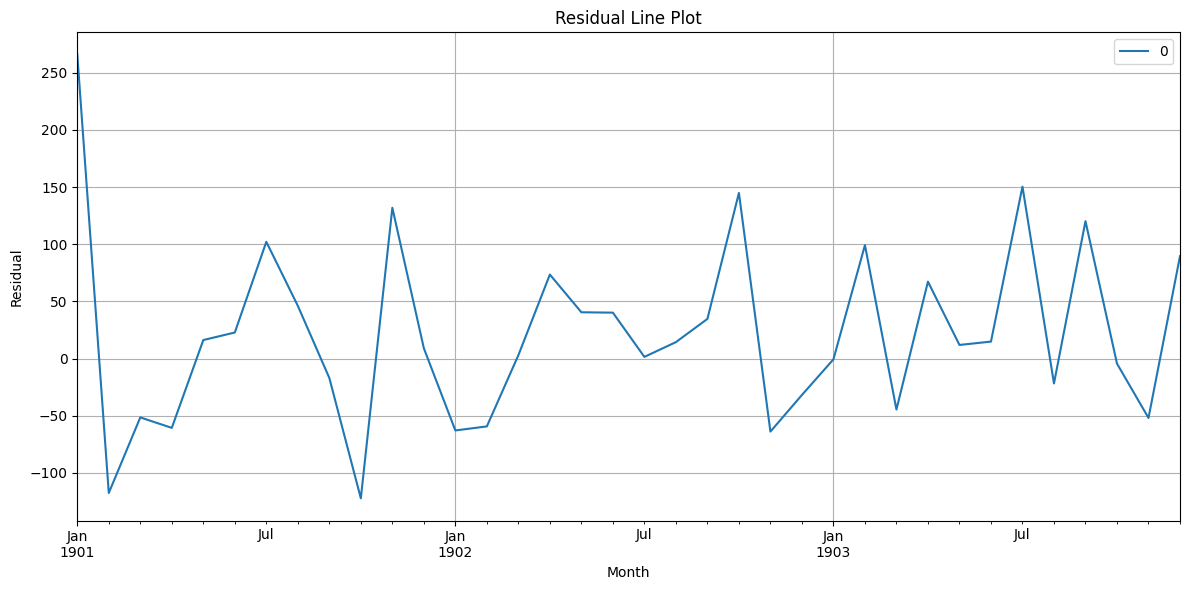

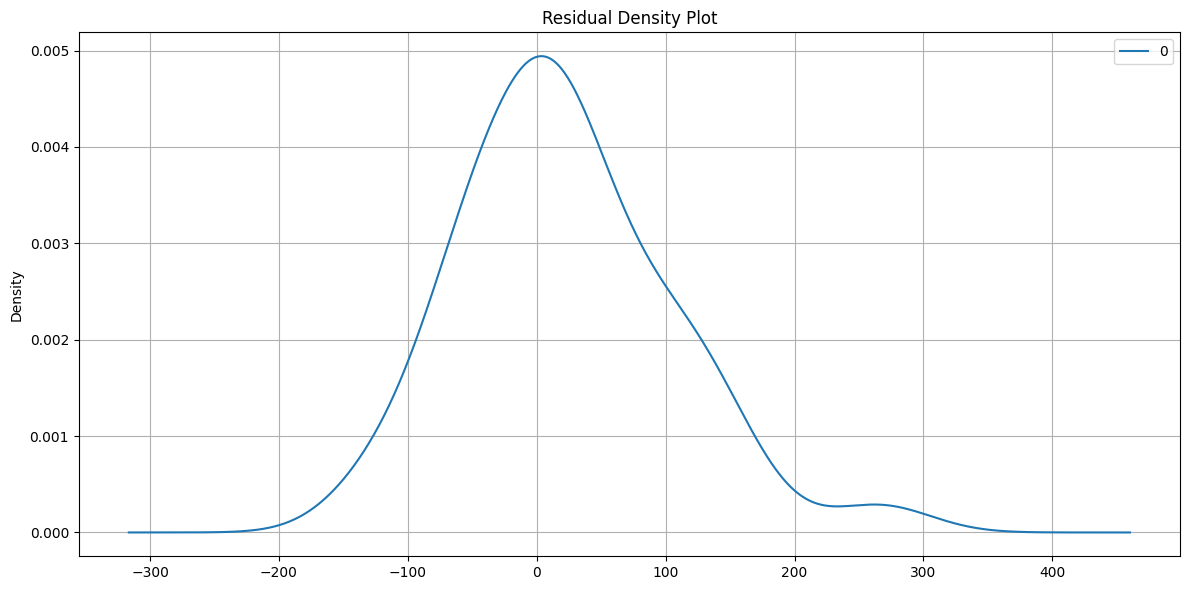

In [8]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

print("======================================================================================")
print("Dataset: (Top 5 Rows)")
print(shampoo_dataset.head())

# Fit model.
model = ARIMA(shampoo_dataset, order=(5, 1, 0), freq='MS')
model_fit = model.fit()

print("======================================================================================")
# Fit model summary.
print(model_fit.summary())

# Line plot of residual. 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(12, 6))
plt.title("Residual Line Plot")
plt.ylabel("Residual")
plt.tight_layout()
plt.grid()
plt.show()

# Density plot of residuals. 
residuals.plot(kind='kde', figsize=(12, 6))
plt.title("Residual Density Plot")
plt.tight_layout()
plt.grid()
plt.show()

### Rolling Forecast ARIMA Model

Predictions: 
Predicted Sale = 343.272180, Actual Sale = 342.300000
Predicted Sale = 293.329674, Actual Sale = 339.700000
Predicted Sale = 368.668956, Actual Sale = 440.400000
Predicted Sale = 335.044741, Actual Sale = 315.900000
Predicted Sale = 363.220222, Actual Sale = 439.300000
Predicted Sale = 357.645324, Actual Sale = 401.300000
Predicted Sale = 443.047835, Actual Sale = 437.400000
Predicted Sale = 378.365674, Actual Sale = 575.500000
Predicted Sale = 459.415021, Actual Sale = 407.600000
Predicted Sale = 526.890876, Actual Sale = 682.000000
Predicted Sale = 457.231274, Actual Sale = 475.300000
Predicted Sale = 672.914943, Actual Sale = 581.300000
Predicted Sale = 531.541449, Actual Sale = 646.900000
Accuracy: 
Test RMSE: 89.021


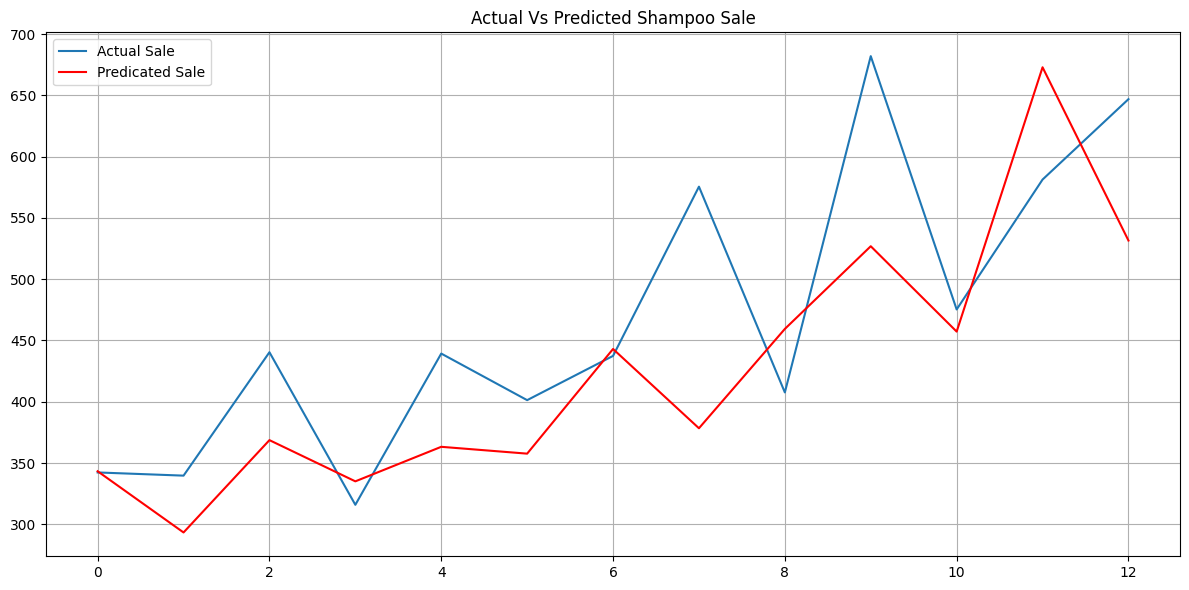

In [9]:
# split into train and test sets
X = shampoo_dataset.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
print("================================================================")
print("Predictions: ")
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('Predicted Sale = %f, Actual Sale = %f' % (yhat, obs))
	

# evaluate forecasts
print("================================================================")
print("Accuracy: ")
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
print("================================================================")

# plot forecasts against actual outcomes
plt.figure(figsize=(12, 6)) 
plt.plot(test, label="Actual Sale")
plt.plot(predictions, color='red', label="Predicated Sale")
plt.title("Actual Vs Predicted Shampoo Sale")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()